In [39]:
import torch.nn as nn
import torch
import numpy as np
import cv2
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt

# The Convolution Operation
</br>

## Convolution은 어떻게 작동하는가?(The convolution operation)
* 두 개의 function(Image x Kernel)을 통해 Feature map을 생성한다.
* input image와 kernal(filter)의 연산을 통해 나온 출력을 output(Feature map)이라 한다.
* 즉 첫 'Function'은 입력으로 주어진 image이며 이를 Kernel(Filter)와 결합하여 Feature map(Output)을 생성하는 것 이를 Convolution Operation이라 하며 CNN을 이해하는 데 기초가 된다.


**<center><font color = 'red' size = 6> Image x Kernel = Feature map </font> </center>**

## Example of Convolution Operation

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVaG4g%2FbtrFLCjYLgC%2FKkpWldKYCYlYn58FsNsSuK%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbANBR4%2FbtrFGN79lbS%2FHlYLAS1XZGKoT2Ed9r1xE1%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbkumuN%2FbtrFJlDe8ib%2Fu4Mg5EYipAHfKezQaBmdB0%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcQOtVf%2FbtrFLBSUstf%2FkxROhbLDXyK37l1IlxDpsk%2Fimg.png)

## Image Features
* Kernel(Filter)는 image의 feature를 탐지(detect)한다.

## Conv Filter를 정의하는 Parameters

* Kernel size(k x k)
* Depth(1 for grayscale or 3 for RGB)
* Stride
* Padding

## **Padding**

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbWBPKP%2FbtrFLB6so77%2FbohIDASYqDUZgXzdVYqeb1%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnrHXR%2FbtrFHKwMjvF%2FT5jTNfggLzNtKGWflZ4L41%2Fimg.png)

### Padding을 하는 이유
* Padding이 없다면 image 모서리의 정보를 Kernel이 거치는 와중에 feature map에 많이 담지 못하는 반면, 모서리 외의 정보는 Kernel이 많이 거쳐 정보를 온전히 보전할 수 있음

## **Stride**
* Stride가 클수록 Feature map(output)크기가 작아짐
* Stride가 클수록 overlap이 적음
* Stride로 Feature map output size를 조절할 수 있음

### Stride 2일 경우 Feature map 생성 예시
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcf1Wsp%2FbtrFLANe7WB%2FA2ZUWKoePTyjnEkYGTQdX1%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FYvHUx%2FbtrFJmWtDbM%2FPJDPPexWxj7KqUeuGdEw4K%2Fimg.png)

### Output(Feature map) size 공식

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcTk8M3%2FbtrFGUfzuAS%2F3MtwxkyYsarVzt5bcwG6dK%2Fimg.png) 


# 활성화 함수 ReLU(Activation Layer ReLU)

### 활성화 함수의 목적
데이터의 complex pattern 학습을 가능하게 함

### 활성화 함수의 종류
활용 가능한 활성화 함수는 여러 개 있지만 CNN에서는 ReLU를 주로 사용함

### ReLU의 장점
* 연산이 효율적(훈련 속도 빠름)
* Saturation 현상 없음(0으로 수렴하여 정보를 잃어버리는 현상)

##### ReLU 작동 방식
* 모든 음수 정보를 0으로 전환함
* 모든 양수 정보를 보존함

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbP1PXc%2FbtrFIeRXbfe%2FYORXLB41wEM78grtohXAKK%2Fimg.png)
ReLU함수

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbTaj68%2FbtrFLBSXL5O%2FFKdSCFmJlDTun6y2V34PL0%2Fimg.png)
<center> ReLU 활성화 함수 적용 예시 </center>


# Pooliang
* Pooling은 Feature map의 size를 줄이기 위해 주로 사용
* 중요한 feature를 유지하면서 parameter 수를 줄일 수 있음
* 즉 앞선 layer들을 거치고 나온 output feature map의 모든 data가 학습에 필요한 것이 아니고 적당한 data만 있으면 되기 떄문에 parameter를 줄이는 것이 빠른 학습에 도움이 됨
* Subsampling 또는 Downsampling이라고도 함

### Example of max pooling
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbEMFjb%2FbtrFGm31xez%2FnzfhgyL9HxQf3USReSrL31%2Fimg.png)

* 일반적으로 Max pooling의 설정 2x2 Kernal, stride = 2, padding = 0이며 이 경우 feature map의 크기를 2배 줄여줌
* Pooling은 모델이 이미지 왜곡, 변형을 방지하는 역할도 함
* Pooling에는 average pooling, sum pooling또한 있음

#### etc
* Max Pooling을 통한 upsampling의 경우 Pooling 레이어의 위치 정보를 활용하여 Sementic segmentation가능함

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FvGLFt%2FbtrFQXn6KKT%2FxVGYXNi7sz5WLb9hQ3Fc40%2Fimg.png)

# Fully Connected Layer
### Fully connected란?
* 한 층(layer)의 모든 노드(뉴런)가 다음 층의 모든 output(뉴런)과 연결됨
* 이전 층의 3D Volume output을 1차원 배열로 평탄화하여 single vector로 전환 및 다음 layer로(softmax 등)로 분류
* Dense Layer라고 하기도 함


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbdct94%2FbtrFHcNozzC%2Ftk1txUPLGF7SJPasCcsP9k%2Fimg.png)
</br>Max Pool Layer를 평탄화한 FC Layer</br>

위 사진에서 왼쪽의 모든 feature map output(혹은 Max pool output)을 평탄화(FC Layer)하여 단일 벡터(Single vector)로 만들어 전부 다음 노드에 연결할 수 있도록 한다.</br>
2 x 2 Feature map 3개가 12 x 1의 single vector로 변한 것을 확인 가능하다.

## Perpose of the Fully Connected Layer
* FC Layer는 이전 층에서 추출한 output/feature를 컴파일하여 final output을 만든다.
* FC Layer는 non-linear 층의 feature를 학습, 분류하기 위해 사용된다.

# Softmax Layer
* 각 class에 해당하는 확률 outcome을 생성하기 위한 층
* Softmax는 실제 output을 확률로 전환시켜줌
* 각 output의 exponential을 그 모든 exp의 합으로 정규화(normalize) 하여 구함
* softmax 함수의 모든 값의 합은 1 
* softmax 함수의 출력 중 0은 없음

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fp0djw%2FbtrFKGtXuAW%2FVGKhVZsxgyHhyE11Ru2hKk%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FR7jvP%2FbtrFImvmzY2%2FhrnZwfOHlk3jvNsZvVPo9k%2Fimg.png)
</br>출처: https://deepai.org/machine-learning-glossary-and-terms/softmax-layer</br></br></br>
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcatyp7%2FbtrFNHlnjyb%2FoipYgTovEmqKqYhoGMYoMk%2Fimg.png)
</br>
* Logits Scores가 CNN의 output이라 가정.
* 구분해야 할 class가 dog, cat, penguin으로 3개가 있다면 위 사진처럼 최종 output 또한 3개
* 일반적으로 각 class에 대한 높은 점수는 해당 class에 대한 높은 기댓값을 나타냄
* 하지만 수많은 output에 대하여는 한 눈에 어떤 class가 높은 score를 갖는지 구분하기 어려움
* 이를 수학적 확률로 쉽게 변형시키는 것이 softmax 함수</br></br>
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FloonT%2FbtrFRcTbsgl%2FUzYXxFdpK6XNMuYcanbZOK%2Fimg.png)

In [76]:
m = nn.Softmax(dim = 1)
input = torch.tensor([[8, 5, 0]], dtype=float)
print(input)
output = m(input)
print(output)

tensor([[8., 5., 0.]], dtype=torch.float64)
tensor([[9.5227e-01, 4.7411e-02, 3.1945e-04]], dtype=torch.float64)


# Building a CNN
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fs1TjG%2FbtrFGm4cju8%2F93gsDa6pjn3fq0DIKbcVmK%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbfNqDc%2FbtrFJlqgKQO%2FilgNmL5wIJzwpRysrequ41%2Fimg.png)
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcz2x5h%2FbtrFJ9b8l59%2FlqQPAsjKoL2IW2Nk7mNwd0%2Fimg.png)
* Conv1, Conv2 각 block은 32, 64 Kernel을 가짐
* stride = 1
* padding = 0
* Maxpool stride = 2
* FC Layer nodes = 128
* Dataset classes = 10
* Final layer nodes = 10

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbkHBAh%2Fbtq16s2ilpz%2FiQhAXPICkkH2g2jk7KFRg1%2Fimg.png)

In [214]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def imshow(image,image_labels, size = 10):
    batchsize = len(image_labels)
    plt.figure(figsize = (16, 10))
    for i in range(1, batchsize):
        class_name = classes[image_labels[i]]
        plt.subplot(2, 5, i)
        plt.title("{}".format(class_name))
        
        plt.imshow(image[i].permute(1, 2, 0), cmap="gray_r")
    plt.show()

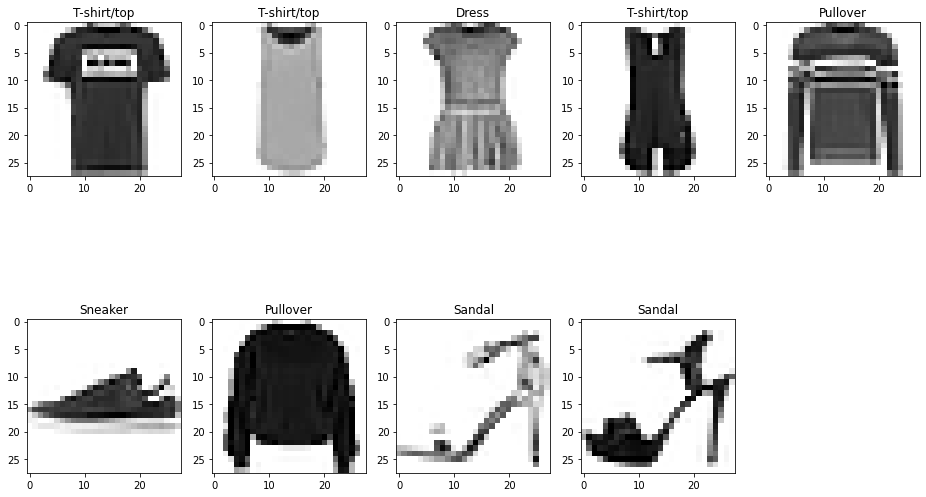

input-> 	 torch.Size([10, 1, 28, 28])
Conv-> 		 torch.Size([10, 32, 26, 26])
ReLU-> 		 torch.Size([10, 32, 26, 26])
Conv-> 		 torch.Size([10, 64, 24, 24])
Max pool-> 	 torch.Size([10, 64, 12, 12])
reshape 64x4x4-> torch.Size([10, 9216])
FC1 ->		 torch.Size([10, 128])
FC2 ->		 torch.Size([10, 10])


In [215]:
data = torchvision.datasets.FashionMNIST(root = "./data", train = True, transform = T.ToTensor(), download=True)
input_loader = torch.utils.data.DataLoader(data, batch_size=10)
input, input_labels = iter(input_loader).next()

imshow(input, input_labels)
#input = torch.randn((10, 1, 28, 28))
print("input-> \t", input.shape)
conv1 = nn.Conv2d(in_channels = 1, out_channels=32, kernel_size= 3, stride= 1, padding= 0)
conv2 = nn.Conv2d(32, 64, 3, 1)
relu = nn.ReLU()
maxpool = nn.MaxPool2d(kernel_size=2)


out = conv1(input)
print("Conv-> \t\t", out.shape)
out = relu(out)
print("ReLU-> \t\t", out.shape)
out = conv2(out)
print("Conv-> \t\t", out.shape)
out = relu(out)
out = maxpool(out)
print("Max pool-> \t", out.shape)
out = out.reshape(-1, 9216)
print("reshape 64x4x4->", out.shape)
out = nn.Linear(9216, 128)(out)
print("FC1 ->\t\t", out.shape)
out = nn.Linear(128, 10)(out)
print("FC2 ->\t\t", out.shape)